In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import csv

In [2]:
file = open('final_data.csv')

In [3]:
csvreader = csv.reader(file)

In [4]:
columns = next(csvreader)
columns

['',
 'address',
 'owners',
 'housetype',
 'house_condition',
 'BHK',
 'price',
 'per_month_emi',
 'total_sqft',
 'cordinates',
 'latitude',
 'longitude']

In [5]:
rows = []
for row in csvreader:
        rows.append(row)
rows

[['0',
  'Sheetal Vihar, Bhagwant Nagar, Dr.Homi Bhabha Nagar,Nashik',
  'Mahendra Kotwal',
  'Apartment',
  'old',
  '3.0',
  '75.0',
  '39.72',
  '1550.0',
  'Sheetal Vihar',
  '19.987960000000047',
  '73.78739000000007'],
 ['1',
  'Samraat Dream Citi, Samta Nagar, Nashik',
  'Jiten Dadarkar',
  'Apartment',
  'old',
  '2.0',
  '41.0',
  '21.71',
  '1000.0',
  'Samraat Dream Citi',
  '19.98246000000006',
  '73.81184000000006'],
 ['2',
  'Suryaprakash Apartment,Nashik Road, Nashik',
  'Pankaj',
  'Apartment',
  'old',
  '2.0',
  '53.35',
  '28.25',
  '970.0',
  'Surya Prakash',
  '19.975850000000037',
  '73.78875000000005'],
 ['3',
  'Adishvar Residency,Nashik Road, Nashik',
  'Saurav',
  'Apartment',
  'old',
  '2.0',
  '55.0',
  '29.13',
  '1000.0',
  'Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401',
  '19.930532200967072',
  '73.8117340346891'],
 ['4',
  'Nashik Road, Nashik',
  'Vivek Pavanaskar',
  'Apartment',
  'old',
  '2.0',
  '27.0',
  '14.3',
  '853.0',
  'Nashik R

In [6]:
BHK = []
for row in rows :
    if(row[5] == ''):
        BHK.append(0)
    else:
        BHK.append(float(row[5]))
prices = []
for row in rows :
    if(row[6] == '') :
        prices.append(0)
    else:
        prices.append(float(row[6]))
per_month_emi = []
for row in rows :
    if(row[7]==''):
        per_month_emi.append(0)
    else:
        per_month_emi.append(float(row[7]))
total_sqft = []
for row in rows :
    if(row[8]==''):
        total_sqft.append(0)
    else:
        total_sqft.append(float(row[8]))


In [7]:
spaces = []
for row in rows :
    spaces.append(float(row[10]) * float(row[11]))
spaces

[1474.859399824405,
 1474.9421403264057,
 1473.9930016875037,
 1471.1071419875882,
 1473.517850625905,
 1475.1979566396064,
 1477.9819084296055,
 1473.4251887500045,
 1473.5244159636072,
 1477.1071793952042,
 1472.7889642620055,
 1472.7889642620055,
 1473.517850625905,
 1473.517850625905,
 1473.517850625905,
 1473.2879377102029,
 1473.517850625905,
 1476.9806174398068,
 1474.2875288260045,
 1472.3264598750072,
 1472.3264598750072,
 1472.531126478307,
 1474.4722559835036,
 1474.1244961438683,
 1473.9130420384067,
 1474.0184703055033,
 1473.9932046764297,
 1473.517850625905,
 1474.5558200025034,
 1473.517850625905,
 1474.7409552120048,
 1474.733302982404,
 1475.4296786156046,
 1513.6740087960063,
 1474.2762231035042,
 1473.2984547090055,
 1475.6600035808056,
 1474.117503597905,
 1473.517850625905,
 1473.7360438581056,
 1474.451313644404,
 1473.7360438581056,
 1473.517850625905,
 1473.517850625905,
 1473.517850625905,
 1475.363570604006,
 1473.517850625905,
 1473.979013497505,
 1475.36357

In [8]:
# observations = 1000000
ss = np.array(spaces)
bs = np.array(BHK)
ms = np.array(per_month_emi)
ts = np.array(total_sqft)
ps = np.array(prices)

inputs = np.column_stack((ss,bs,ms,ts,ps))
assert not np.any(np.isnan(inputs))
inputs



array([[1474.85939982,    3.        ,   39.72      , 1550.        ,
          75.        ],
       [1474.94214033,    2.        ,   21.71      , 1000.        ,
          41.        ],
       [1473.99300169,    2.        ,   28.25      ,  970.        ,
          53.35      ],
       ...,
       [1479.55894089,    2.        ,   18.17      ,    0.        ,
          34.32      ],
       [1478.4218136 ,    0.        ,    0.        ,    0.        ,
           0.        ],
       [1477.86282219,    0.        ,    0.        ,    0.        ,
           0.        ]])

In [9]:
#create target

targets = np.array(prices)
assert not np.any(np.isnan(targets))
np.savez('TF_apartment' , inputs=inputs , outputs=targets)
targets

array([75.  , 41.  , 53.35, ..., 34.32,  0.  ,  0.  ])

In [10]:
training_data = np.load('TF_apartment.npz')

In [11]:
#create our model
#it was a simple linear regression model
input_size = 5
output_size = 1
model = tf.keras.Sequential([
        #customize weights and biases:
        #kernel : weight

    tf.keras.layers.Dense(output_size 
    ,kernel_initializer = tf.random_uniform_initializer(minval=-0.1 , maxval=0.1) ,
    bias_initializer = tf.random_uniform_initializer(minval=-0.1 , maxval=0.1) 
    )
])
#customize learning rate

custom_optimizer = tf.keras.optimizers.SGD(learning_rate = 0.00000009)

model.compile(optimizer = custom_optimizer  , loss='mean_squared_error' )
model.fit(training_data['inputs'] , training_data['outputs'] , epochs=100 , verbose=2)

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Epoch 1/100


2022-08-12 00:51:50.705303: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-12 00:51:50.705737: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-08-12 00:51:50.823058: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-12 00:51:51.107062: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 - 1s - loss: 23684.1191 - 854ms/epoch - 5ms/step
Epoch 2/100
172/172 - 1s - loss: 86.8517 - 539ms/epoch - 3ms/step
Epoch 3/100
172/172 - 0s - loss: 3.2670 - 485ms/epoch - 3ms/step
Epoch 4/100
172/172 - 0s - loss: 3.8594 - 486ms/epoch - 3ms/step
Epoch 5/100
172/172 - 0s - loss: 2.6128 - 480ms/epoch - 3ms/step
Epoch 6/100
172/172 - 0s - loss: 3.4767 - 497ms/epoch - 3ms/step
Epoch 7/100
172/172 - 0s - loss: 1.8658 - 488ms/epoch - 3ms/step
Epoch 8/100
172/172 - 0s - loss: 3.5395 - 489ms/epoch - 3ms/step
Epoch 9/100
172/172 - 0s - loss: 3.0635 - 473ms/epoch - 3ms/step
Epoch 10/100
172/172 - 0s - loss: 2.9899 - 478ms/epoch - 3ms/step
Epoch 11/100
172/172 - 0s - loss: 2.9112 - 476ms/epoch - 3ms/step
Epoch 12/100
172/172 - 0s - loss: 2.8926 - 482ms/epoch - 3ms/step
Epoch 13/100
172/172 - 0s - loss: 1.7355 - 477ms/epoch - 3ms/step
Epoch 14/100
172/172 - 0s - loss: 2.7534 - 478ms/epoch - 3ms/step
Epoch 15/100
172/172 - 1s - loss: 2.0217 - 554ms/epoch - 3ms/step
Epoch 16/100
172/172 - 1s 

In [12]:
weights = model.layers[0].get_weights()[0]
weights

array([[-1.9486477e-04],
       [ 9.0893760e-02],
       [ 1.3201339e-02],
       [-2.9005556e-04],
       [ 9.9990189e-01]], dtype=float32)

In [13]:
bias = model.layers[0].get_weights()[1]
bias

array([-0.03763458], dtype=float32)

In [14]:
#extract the output (make predictions)
model.predict_on_batch(training_data['inputs']).round(1)

2022-08-12 00:52:40.615494: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[75. ],
       [40.8],
       [53.3],
       ...,
       [34.4],
       [-0.3],
       [-0.3]], dtype=float32)

In [15]:
training_data['outputs'].round(1)

array([75. , 41. , 53.4, ..., 34.3,  0. ,  0. ])

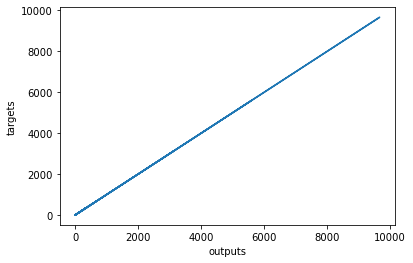

In [16]:
#plotting the data
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])) , np.squeeze(training_data['outputs']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()